# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#url from weathermap
url="http://api.openweathermap.org/data/2.5/weather?"


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

In [4]:
#count of records
count=1
#count of set
setnum=1

#initial empty lists 
lat=[]
lng=[]
maxtemp=[]
humidity=[]
cloud=[]
wind=[]
country=[]
date=[]
citiesnotfound=[]

print("Beginning Data Retrieval")
print("-----------------------")

for x in range(len(cities)): 
    try:
        if count<=50:
            
            #api response for weather
            response=requests.get(query_url + cities[x]).json()

            #append lists for each column needed
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            maxtemp.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"])
            cloud.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            

            print(f"Processing Record {count} of Set {setnum} | {cities[x]}")
            count+=1
            
            
        #new set of 50    
        else: 
            
            #rest for 1 minute
            time.sleep(60)
            
            
            setnum+=1
            count=1
            #api response for weather
            response=requests.get(query_url + cities[x]).json()

            #append lists for each column needed
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            maxtemp.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"])
            cloud.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            

            print(f"Processing Record {count} of Set {setnum} | {cities[x]}")
            
            
            count+=1
    except:
        
        print("City not found. Skipping...")
        citiesnotfound.append(cities[x])
        pass
    
print("Data Retrieval Complete")

Beginning Data Retrieval
-----------------------
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | cockburn town
Processing Record 2 of Set 1 | ucluelet
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | casa nova
Processing Record 5 of Set 1 | terrace
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | sada
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | hata
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | puerto leguizamo
Processing Record 18 of Set 1 | nishihara
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | severodvinsk
City not found. Skipping...
Processing Record 21 of Set

Processing Record 37 of Set 4 | ohara
Processing Record 38 of Set 4 | acajutla
Processing Record 39 of Set 4 | bozhou
Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | port blair
Processing Record 42 of Set 4 | guider
Processing Record 43 of Set 4 | hirara
Processing Record 44 of Set 4 | iracoubo
Processing Record 45 of Set 4 | cayenne
Processing Record 46 of Set 4 | songea
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | jiuquan
Processing Record 49 of Set 4 | westport
Processing Record 50 of Set 4 | nioro
Processing Record 1 of Set 5 | bagdarin
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | murgud
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | florianopolis
Processing Record 7 of Set 5 | terekli-mekteb
Processing Record 8 of Set 5 | ilulissat
City not found. Skipping...
Processing Record 9 of Set 5 | norman wells
Processing Record 10 of Set 5 | a

Processing Record 26 of Set 8 | rafaela
Processing Record 27 of Set 8 | buraydah
Processing Record 28 of Set 8 | gariaband
Processing Record 29 of Set 8 | abeche
Processing Record 30 of Set 8 | williams lake
Processing Record 31 of Set 8 | general macarthur
Processing Record 32 of Set 8 | laguna
Processing Record 33 of Set 8 | barreirinhas
Processing Record 34 of Set 8 | petropavl
Processing Record 35 of Set 8 | deputatskiy
Processing Record 36 of Set 8 | khotyn
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | san marcos
Processing Record 39 of Set 8 | qinzhou
Processing Record 40 of Set 8 | tuatapere
Processing Record 41 of Set 8 | boyolangu
Processing Record 42 of Set 8 | kargasok
Processing Record 43 of Set 8 | inhambane
Processing Record 44 of Set 8 | klimovo
Processing Record 45 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 8 | inirida
City not found. Skipping...
Processing Record 47 of Set 8 | vikhorevka
City not found. Skipping...
Proce

Processing Record 13 of Set 12 | binabalian
Processing Record 14 of Set 12 | monrovia
Processing Record 15 of Set 12 | lenine
Processing Record 16 of Set 12 | misratah
City not found. Skipping...
Processing Record 17 of Set 12 | hovd
Processing Record 18 of Set 12 | talara
Processing Record 19 of Set 12 | srednekolymsk
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#cleanup cities list for dataframe to remove cities that were not found in query 

for city in citiesnotfound:
    if city in cities:
        cities.remove(city)


In [6]:
#creating dictionary for compiled data

weather_dict={
    "City":cities,
    "Lat": lat,
    "Lng":lng,
    "Max Temp":maxtemp,
    "Humidity":humidity,
    "Cloudiness":cloud,
    "Wind Speed":wind,
    "Country": country,
    "Date": date
}


#creating dataframe from dictionary

weather_data=pd.DataFrame(weather_dict)

In [7]:
# writing to CSV file in output_data folder 

weather_data.to_csv(output_data_file, encoding='utf-8')

In [8]:
#Display DataFrame

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cockburn town,21.4612,-71.1419,77.95,72,0,9.44,TC,1643485578
1,ucluelet,48.9329,-125.5528,43.09,89,100,1.01,CA,1643485562
2,dingle,10.9995,122.6711,74.71,91,9,1.57,PH,1643485640
3,casa nova,-9.4167,-41.1333,82.38,74,99,6.58,BR,1643485640
4,terrace,54.5163,-128.6035,39.11,93,100,21.85,CA,1643485514


In [9]:
#Basic Stats of DataFrame 

stats=weather_data.describe()
stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,21.341691,18.267636,48.430439,72.550088,60.478032,8.189051,1.643486e+09
std,33.282671,90.504013,32.021428,21.847214,41.035625,6.476365,2.716401e+02
min,-54.800000,-175.200000,-35.210000,11.000000,0.000000,0.000000,1.643485e+09
25%,-4.577200,-62.996700,24.750000,61.000000,17.000000,3.470000,1.643486e+09
50%,25.516700,24.731400,58.770000,77.000000,75.000000,6.640000,1.643486e+09
75%,49.783400,97.400000,76.170000,89.000000,100.000000,11.210000,1.643486e+09
max,78.218600,179.316700,96.440000,100.000000,100.000000,46.800000,1.643486e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.

over100= weather_data.loc[weather_data["Humidity"]>100].index.tolist()


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data=weather_data.drop(over100,inplace=False)

clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cockburn town,21.4612,-71.1419,77.95,72,0,9.44,TC,1643485578
1,ucluelet,48.9329,-125.5528,43.09,89,100,1.01,CA,1643485562
2,dingle,10.9995,122.6711,74.71,91,9,1.57,PH,1643485640
3,casa nova,-9.4167,-41.1333,82.38,74,99,6.58,BR,1643485640
4,terrace,54.5163,-128.6035,39.11,93,100,21.85,CA,1643485514
...,...,...,...,...,...,...,...,...,...
564,lenine,45.2986,35.7771,34.23,82,85,11.83,UA,1643486498
565,misratah,32.3754,15.0925,57.15,57,100,21.21,LY,1643486498
566,hovd,48.0056,91.6419,-13.02,72,13,3.09,MN,1643486498
567,talara,-4.5772,-81.2719,75.33,72,100,12.48,PE,1643486499


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

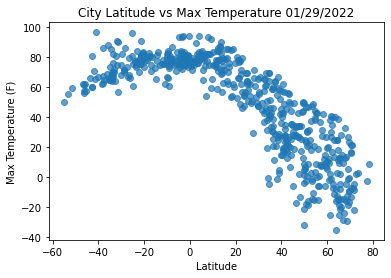

In [12]:
# Create a Scatter Plot for temperature vs latitude
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values,alpha=.7)
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature (F)')

#date of data pull
date=pd.to_datetime(clean_city_data["Date"][0],unit='s').strftime('%m/%d/%Y')

plt.title(f'City Latitude vs Max Temperature {date}')

#saving to png file 
plt.savefig('output_data/city_lat_maxtemp.png')
plt.show()

#### This figure shows the Max Temperature in Farenheit plotted by the Latitudes of the cities. There is a general negative trend between the two variables. 

## Latitude vs. Humidity Plot

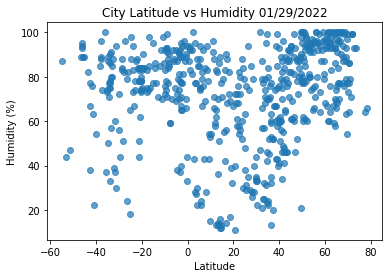

In [13]:
# Create a Scatter Plot for humidity vs latitude
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values,alpha=.7)
plt.xlabel('Latitude')
plt.ylabel(f'Humidity (%)')

plt.title(f'City Latitude vs Humidity {date}')

plt.savefig('output_data/city_lat_humidity.png')
plt.show()

#### This figure shows the Humidity plotted by the Latitudes of the cities. There is not much of a linear trend between the two variables. However, there is a cluster of higher humidity percentage at latitude ~60

## Latitude vs. Cloudiness Plot

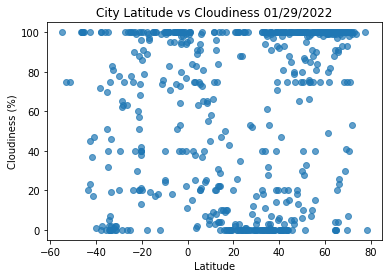

In [14]:
# Create a Scatter Plot for cloudiness vs latitude
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values,alpha=.7)
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness (%)')

plt.title(f'City Latitude vs Cloudiness {date}')

plt.savefig('output_data/city_lat_cloudiness.png')
plt.show()

#### This figure shows the cloudiness plotted by the Latitudes of the cities. There is not much of a linear trend between the two variables. 

## Latitude vs. Wind Speed Plot

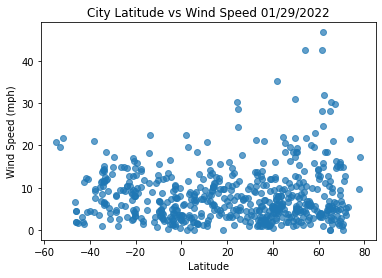

In [15]:
# Create a Scatter Plot for wind speed vs latitude
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values,alpha=.7)
plt.xlabel('Latitude')
plt.ylabel(f'Wind Speed (mph)')

plt.title(f'City Latitude vs Wind Speed {date}')

plt.savefig('output_data/city_lat_windspeed.png')
plt.show()

#### This figure shows the windspeed plotted by the Latitudes of the cities. There is not much of a linear trend between the two variables. Across most latitudes, the windspeed remains below 30mph. There are some higher winds at latitude ~70.

## Linear Regression

In [16]:
northdf=clean_city_data.loc[clean_city_data["Lat"]>=0]
southdf=clean_city_data.loc[clean_city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is -0.8507096643174044


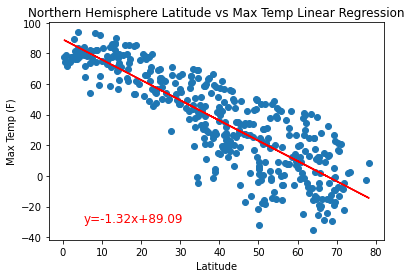

In [17]:
#set up coordinates for Northern Hemisphere
northx=northdf["Lat"]
northy=northdf["Max Temp"]

#Set up linear regression items and equation for temperature
slope,inte,r,p,std_err=linregress(northx,northy)
northfit=slope*northx + inte

#print r value
print(f"The r value is {r}")

#scatter plot with linear regression and annotation 
plt.scatter(northx,northy)
plt.plot(northx,northfit,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'Northern Hemisphere Latitude vs Max Temp Linear Regression')

plt.annotate(f"y={round(slope,2)}x+{round(inte,2)}",(min(northx)+5,min(northy)+5),color="red",fontsize=12)

plt.savefig('output_data/north_lat_temp.png')

plt.show()

#### This figure shows the Max temperature in Farenheit by the Latitudes of the cities in the Northern Hemisphere. There is a negative linear regression with an r-value of -0.87 which indicates high negative correlation between the two variables. As Latitude increases, the Max Temperature decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is 0.5143784923040056


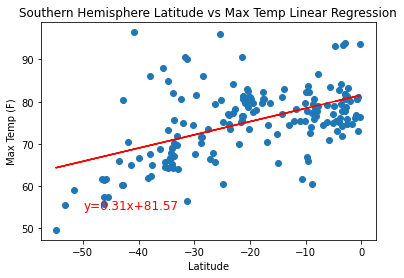

In [18]:
#set up coordinates for Southern Hemisphere
southx=southdf["Lat"]
southy=southdf["Max Temp"]

#Set up linear regression items and equation for temperature
slope,inte,r,p,std_err=linregress(southx,southy)
southfit=slope*southx + inte

#print r value
print(f"The r value is {r}")

#scatter plot with linear regression and annotation 
plt.scatter(southx,southy)
plt.plot(southx,southfit,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'Southern Hemisphere Latitude vs Max Temp Linear Regression')

plt.annotate(f"y={round(slope,2)}x+{round(inte,2)}",(min(southx)+5,min(southy)+5),color="red",fontsize=12)

plt.savefig('output_data/south_lat_temp.png')

plt.show()

#### This figure shows the Max temperature in Farenheit by the Latitudes of the cities in the Southern Hemisphere. There is a shallow linear regression with an r-value of 0.39 which indicates low positive correlation between the two variables.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.4067469156494458


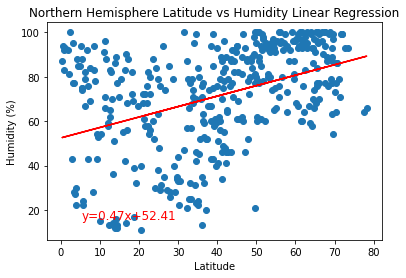

In [19]:
#set up coordinates for Northern Hemisphere
northy=northdf["Humidity"]

#Set up linear regression items and equation for humidity
slope,inte,r,p,std_err=linregress(northx,northy)
northfit=slope*northx + inte

#print r value
print(f"The r value is {r}")

#scatter plot with linear regression and annotation 
plt.scatter(northx,northy)
plt.plot(northx,northfit,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere Latitude vs Humidity Linear Regression')

plt.annotate(f"y={round(slope,2)}x+{round(inte,2)}",(min(northx)+5,min(northy)+5),color="red",fontsize=12)

plt.savefig('output_data/north_lat_hum.png')

plt.show()

#### This figure shows the Humidity by the Latitudes of the cities in the Northern Hemisphere. There is a shallow linear regression with an r-value of 0.43 which indicates low positive correlation between the two variables. However, there is a cluster of higher humidity at latitudes 60-70. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.12533157972540923


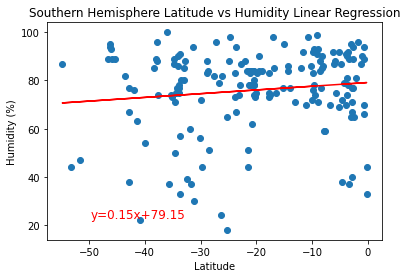

In [20]:
#set up coordinates for Southern Hemisphere
southy=southdf["Humidity"]

#Set up linear regression items and equation for Humidity
slope,inte,r,p,std_err=linregress(southx,southy)
southfit=slope*southx + inte

#print r value
print(f"The r value is {r}")

#scatter plot with linear regression and annotation 
plt.scatter(southx,southy)
plt.plot(southx,southfit,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere Latitude vs Humidity Linear Regression')

plt.annotate(f"y={round(slope,2)}x+{round(inte,2)}",(min(southx)+5,min(southy)+5),color="red",fontsize=12)

plt.savefig('output_data/south_lat_hum.png')

plt.show()

#### This figure shows the Humidity by the Latitudes of the cities in the Southern Hemisphere. There is a shallow linear regression with an r-value of 0.30 which indicates low positive correlation between the two variables. There are no significant relationships when visually analyzing the plot. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.3408378741120641


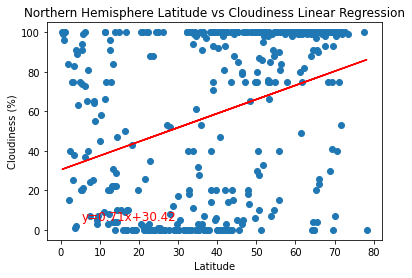

In [21]:
#set up coordinates for Northern Hemisphere
northy=northdf["Cloudiness"]

#Set up linear regression items and equation for cloudiness
slope,inte,r,p,std_err=linregress(northx,northy)
northfit=slope*northx + inte

#print r value
print(f"The r value is {r}")

#scatter plot with linear regression and annotation 
plt.scatter(northx,northy)
plt.plot(northx,northfit,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere Latitude vs Cloudiness Linear Regression')

plt.annotate(f"y={round(slope,2)}x+{round(inte,2)}",(min(northx)+5,min(northy)+5),color="red",fontsize=12)

plt.savefig('output_data/north_lat_cloud.png')

plt.show()

#### This figure shows the Cloudiness by the Latitudes of the cities in the Northern Hemisphere. There is no significant trend between the two variables with an r-value of 0.43 which indicates low positive correlation. There are no significant relationships when visually analyzing the plot. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.3342512169793048


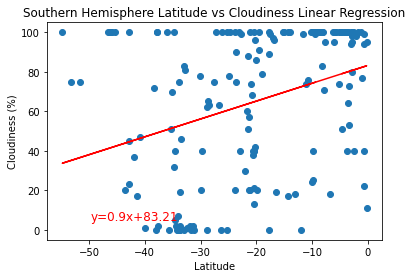

In [22]:
#set up coordinates for Southern Hemisphere
southy=southdf["Cloudiness"]

#Set up linear regression items and equation for Cloudiness
slope,inte,r,p,std_err=linregress(southx,southy)
southfit=slope*southx + inte

#print r value
print(f"The r value is {r}")

#scatter plot with linear regression and annotation 
plt.scatter(southx,southy)
plt.plot(southx,southfit,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere Latitude vs Cloudiness Linear Regression')

plt.annotate(f"y={round(slope,2)}x+{round(inte,2)}",(min(southx)+5,min(southy)+5),color="red",fontsize=12)

plt.savefig('output_data/south_lat_cloud.png')

plt.show()

#### This figure shows the Cloudiness by the Latitudes of the cities in the Southern Hemisphere. There is no significant trend between the two variables with an r-value of 0.42 which indicates low positive correlation. There are no significant relationships when visually analyzing the plot. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is 0.12829134883212587


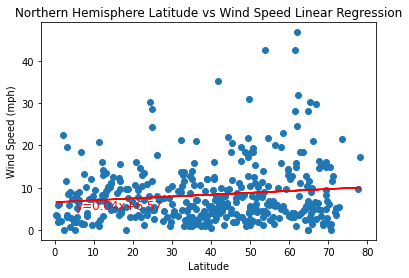

In [23]:
#set up coordinates for Northern Hemisphere
northy=northdf["Wind Speed"]

#Set up linear regression items and equation for wind speed
slope,inte,r,p,std_err=linregress(northx,northy)
northfit=slope*northx + inte

#print r value
print(f"The r value is {r}")

#scatter plot with linear regression and annotation 
plt.scatter(northx,northy)
plt.plot(northx,northfit,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere Latitude vs Wind Speed Linear Regression')

plt.annotate(f"y={round(slope,2)}x+{round(inte,2)}",(min(northx)+5,min(northy)+5),color="red",fontsize=12)

plt.savefig('output_data/north_lat_wind.png')

plt.show()

#### This figure shows the Windspeed by the Latitudes of the cities in the Northern Hemisphere. There is no significant trend between the two variables with an r-value of 0.1 which indicates very low positive correlation. There are no significant relationships when visually analyzing the plot. However, most cities across the latitudes reported Wind Speed less than ~30mph with the exception of a few higher windspeeds at latitudes 60-70

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is -0.2759934919738785


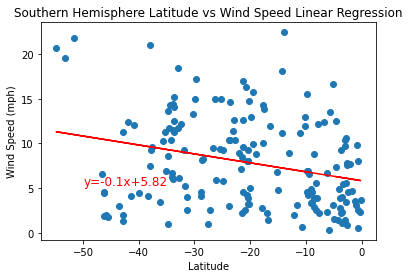

In [24]:
#set up coordinates for Southern Hemisphere
southy=southdf["Wind Speed"]

#Set up linear regression items and equation for wind speed
slope,inte,r,p,std_err=linregress(southx,southy)
southfit=slope*southx + inte

#print r value
print(f"The r value is {r}")

#scatter plot with linear regression and annotation 
plt.scatter(southx,southy)
plt.plot(southx,southfit,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere Latitude vs Wind Speed Linear Regression')

plt.annotate(f"y={round(slope,2)}x+{round(inte,2)}",(min(southx)+5,min(southy)+5),color="red",fontsize=12)

plt.savefig('output_data/south_lat_wind.png')

plt.show()

#### This figure shows the Windspeed by the Latitudes of the cities in the Southern Hemisphere. There is no significant trend between the two variables with an r-value of -0.16 which indicates very low negative correlation. There are no significant relationships when visually analyzing the plot. 

## 3 Observable Trends 

1. the northern hemisphere has a strong correlation between Max Temp and Latitude, as shown by the r value -0.85. This makes sense based on the time of year and normal weather patterns. 
2. the northern hemisphere, although has a weaker correlation between latitude and humidity, shows a cluster at the 60-70 latitude line of higher humidity. 
3. cloudiness shows similar lack of trend between the northern and southern hemisphere. It would be difficult to assume any predictions based on latitude alone. 